In [43]:
import random

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

%matplotlib inline

random.seed(5)
np.random.seed(5)
torch.random.manual_seed(5)

### Question 1.1

In [44]:
x1 = np.array([-2.0, 1.0, 0.5])
x2 = np.array([1.0, 1.5, -0.5])
x3 = np.array([-1.5, 1.0, -0.5])
x4 = np.array([-2.0, -2.5, 1.5])

X = np.array([x1, x2, x3, x4])

print(X.shape)

(4, 3)


In [45]:
q = np.array([-2.0, 1.0, -1.0])

print(np.size(q))

scores = X.dot(q) / np.sqrt(np.size(q))
probabilities = np.exp(scores) / np.sum(np.exp(scores))
output = X.T.dot(probabilities)

print(X.dot(q))
print(scores)
print(probabilities)
print(output)

3
[4.5 0.  4.5 0. ]
[2.59807621 0.         2.59807621 0.        ]
[0.46536883 0.03463117 0.46536883 0.03463117]
[-1.66342208  0.8961065   0.03463117]


### Question 1.2

In [46]:
W_Q = np.array([[1, -1.5], [0, 2], [-0.5, -1]])
W_K = np.array([[-1.5, -1], [2.5, 0], [0.5, -1]])
W_V = np.array([[1, 2.5], [-0.5, -2], [0, -1]])

#print(W_Q)
#print(W_K)
#print(W_V)

Q = X.dot(W_Q)
K = X.dot(W_K)
V = X.dot(W_V)

print(Q)
print(K)
print(V)

print(np.sqrt(np.size(Q, 1)))

scores = Q.dot(K.T) / np.sqrt(np.size(Q, 1))
probabilities = np.exp(scores) / np.sum(np.exp(scores), axis=1)[:, None]

Z = probabilities.dot(V)

print(scores)
print(probabilities)
print(Z)

print(probabilities.sum(axis=1))

[[-2.25  4.5 ]
 [ 1.25  2.  ]
 [-1.25  4.75]
 [-2.75 -3.5 ]]
[[ 5.75  1.5 ]
 [ 2.   -0.5 ]
 [ 4.5   2.  ]
 [-2.5   0.5 ]]
[[-2.5  -7.5 ]
 [ 0.25  0.  ]
 [-2.   -5.25]
 [-0.75 -1.5 ]]
1.4142135623730951
[[ -4.37522321  -4.77297077  -0.79549513   5.5684659 ]
 [  7.20365033   1.06066017   6.80590277  -1.50260191]
 [ -0.04419417  -3.44714556   2.74003878   3.8890873 ]
 [-14.89343658  -2.65165043 -13.70019389   3.62392225]]
[[4.79433566e-05 3.22098620e-05 1.71943035e-03 9.98200416e-01]
 [5.97319598e-01 1.28333499e-03 4.01298182e-01 9.88847812e-05]
 [1.46423661e-02 4.87223528e-04 2.37021787e-01 7.47848624e-01]
 [9.06143069e-09 1.87817885e-03 2.98824011e-08 9.98121782e-01]]
[[-0.75220098 -1.50668721]
 [-2.29564869 -6.58686077]
 [-1.07141415 -2.47595506]
 [-0.74812187 -1.4971829 ]]
[1. 1. 1. 1.]


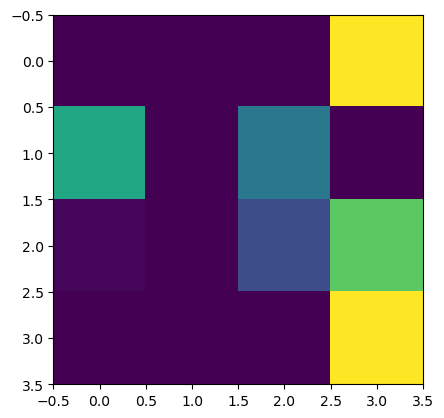

In [47]:
import matplotlib.pyplot as plt
plt.imshow(probabilities)

### Question 1.3

[[4.79433566e-05 3.22098620e-05 1.71943035e-03 9.98200416e-01]
 [5.97319598e-01 1.28333499e-03 4.01298182e-01 9.88847812e-05]
 [1.46423661e-02 4.87223528e-04 2.37021787e-01 7.47848624e-01]
 [9.06143069e-09 1.87817885e-03 2.98824011e-08 9.98121782e-01]]
[[-0.75220098 -1.50668721]
 [-2.29564869 -6.58686077]
 [-1.07141415 -2.47595506]
 [-0.74812187 -1.4971829 ]]


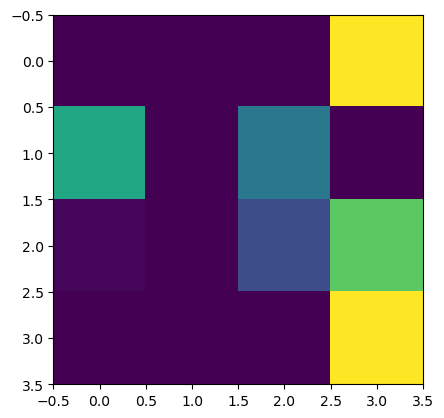

[[1.18306921e-01 2.01966211e-02 1.68483136e-01 6.93013322e-01]
 [8.48429312e-04 9.98944583e-01 2.06267364e-04 7.20592823e-07]
 [2.67590116e-02 7.79843042e-04 5.42703523e-02 9.18190793e-01]
 [2.47463407e-05 6.12522986e-10 2.06437556e-04 9.99768815e-01]]
[[-2.26628332 -2.26628332]
 [ 1.99725652  1.99725652]
 [-2.82066255 -2.82066255]
 [-2.99952526 -2.99952526]]


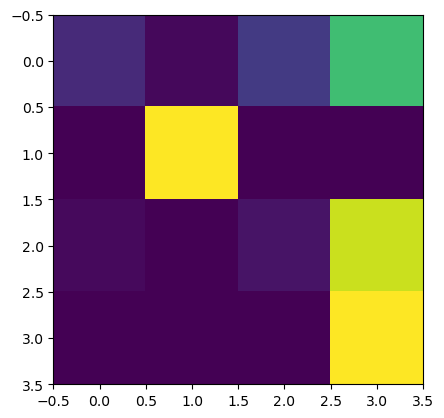

[[-0.75220098 -1.50668721 -2.26628332 -2.26628332]
 [-2.29564869 -6.58686077  1.99725652  1.99725652]
 [-1.07141415 -2.47595506 -2.82066255 -2.82066255]
 [-0.74812187 -1.4971829  -2.99952526 -2.99952526]]
[[-6.04664898  3.77781072 -0.75731086]
 [ 8.28741825  0.14750295 10.57968068]
 [-7.3905735   5.09982766 -0.01158073]
 [-8.25045389  4.87428797 -1.50140321]]


In [48]:
W_O = np.array([[-1, 1.5, 2], [0, -1, -2], [1, -1.5, 0], [2, 0, 1]])

W_Q_heads = [W_Q, np.ones_like(W_Q)]
W_K_heads = [W_K, np.ones_like(W_K)]
W_V_heads = [W_V, np.ones_like(W_V)]

head_representations = []

for W_Q_h, W_K_h, W_V_h in zip(W_Q_heads, W_K_heads, W_V_heads):
    Q_h = X.dot(W_Q_h)
    K_h = X.dot(W_K_h)
    V_h = X.dot(W_V_h)
    scores = Q_h.dot(K_h.T) / np.sqrt(np.size(Q_h, 1))
    probabilities = np.exp(scores) / np.sum(np.exp(scores), axis=1)[:, None]
    Z_h = probabilities.dot(V_h)
    head_representations.append(Z_h)
    print(probabilities)
    print(Z_h)
    plt.imshow(probabilities)
    plt.show()
    
print(np.concatenate(head_representations, axis=1))

Z = np.concatenate(head_representations, axis=1).dot(W_O)

print(Z)

### Question 2

In this exercise, you will implement a sequence-to-sequence network that reverses strings with the help of attention. We will randomly generate strings consisting of characters in \{"a", "b", "c", "d"\}.

In [49]:

# instantiate vocabulary
# set vocab for <start of string> and <end of string>
# BOS = "<s>"
# EOS = "</s>"

class Vocab:
    def __init__(self, vocab):
        self.bos = "<s>"
        self.eos = "</s>" 
        ext_vocab = [self.bos, self.eos] + raw_vocab
        self.index2string = {i: n for i, n in enumerate(ext_vocab)}
        self.string2index = {n: i for i, n in enumerate(ext_vocab)}

    def __len__(self):
        return len(self.index2string)

raw_vocab = list("abcd")
vocab = Vocab(raw_vocab)


def sample_string(min_length, max_length):
    length = random.randrange(min_length, max_length)
    return "".join([random.choice(raw_vocab) for _ in range(length)])

def sample_strings(min_length, max_length, size):
    return [sample_string(min_length, max_length) for _ in range(size)]

def to_tensor(name):
    indices = [vocab.string2index[vocab.bos]] + [vocab.string2index[n] for n in name] + [vocab.string2index[vocab.eos]]
    return torch.tensor(indices, dtype=torch.long).unsqueeze(0)

def make_dataset(lines):
    dataset = [(to_tensor(line), to_tensor(reversed(line))) for line in lines]
    return dataset


#generate train/val splits
train_size = 200
valid_size = 100

train_lines = sample_strings(3, 15, train_size)
valid_lines = sample_strings(3, 15, valid_size)

train_dataset = make_dataset(train_lines)
valid_dataset = make_dataset(valid_lines)

print(train_lines[:10])

['ccadbabacdbd', 'ababdcbdbab', 'dbbaabbbbccb', 'bbbdcacdbbc', 'ccac', 'cccd', 'cbddbacacdadcd', 'adabbabdcccd', 'ccad', 'bccb']


The first part of the model is an RNN-based encoder: we will use an LSTM ([nn.LSTM](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html)) module for this.

In [50]:
class Encoder(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size, bidirectional=False):
        super(Encoder, self).__init__()

        # set embedding layer 
        # compute hidden size for RNN
        # initialise RNN module -- instantiate as an LSTM 
        # use nn.LSTM
        self.embeddings = nn.Embedding(vocab_size, embedding_size)

        if bidirectional:
            hidden_size //= 2
        self.rnn = nn.LSTM(
            embedding_size, 
            hidden_size, 
            bidirectional=bidirectional, 
            batch_first=True
        )

    def forward(self, input, hidden=None):
        """
        input (LongTensor): batch x src length
        src length (batch-length list): If given, the input will be packed
        hidden: hidden or hidden/cell state input dimensions for the RNN type
        
        ==> you may need to reshape the hidden layer: bidirectional LSTM will 
            return a concatenation of the final forward and reverse hidden states 
            forward and backward are directions 0 and 1 respectively
            check the _reshape_hidden function
        
        returns:
            output (FloatTensor): batch x src length x hidden size
            hidden_n (FloatTensor): hidden or hidden/cell state input
                dimensions for the RNN type
        """
        emb = self.embeddings(input)
        output, hidden_n = self.rnn(emb, hidden)
        if self.rnn.bidirectional:
            hidden_n = self._reshape_hidden(hidden_n)
        return output, hidden_n

    def _merge_tensor(self, state_tensor):
        forward_states = state_tensor[::2]
        backward_states = state_tensor[1::2]
        return torch.cat([forward_states, backward_states], 2)

    def _reshape_hidden(self, hidden):
        """
        hidden:
            num_layers * num_directions x batch x self.hidden_size // 2
            or a tuple of these
        returns:
            num_layers
        """
        assert self.rnn.bidirectional
        if isinstance(hidden, tuple):
            return tuple(self._merge_tensor(h) for h in hidden)
        else:
            return self._merge_tensor(hidden)

We also need to define a decoder. We will also use an LSTM module for the decoder. We can add an attention mechanism on the outputs. This implementation works both with and without an attention mechanism.

In [51]:
class Decoder(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size, attn=None):
        super(Decoder, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_size)
        self.rnn = nn.LSTM(embedding_size, hidden_size, batch_first=True)
        self.output_layer = nn.Linear(hidden_size, vocab_size)
        self.attn = attn

    def forward(self, input, context, hidden):
        """
        input (LongTensor): batch x tgt length
        context (FloatTensor): batch x src length x hidden size
        hidden: hidden or hidden/cell state input dimensions for the RNN type
        returns (FloatTensor): (batch*tgt length) x output size
        """
        emb = self.embeddings(input)
        output, hidden_n = self.rnn(emb, hidden)
        
        # apply attention between source context and query from
        # decoder RNN
        alignment = None
        if self.attn is not None:
            output, alignment = self.attn(output, context)

        flat_output = output.contiguous().view(-1, self.rnn.hidden_size)
        output = self.output_layer(flat_output)
        return output, alignment

We can put them together into an encoder-decoder model class, like this:

In [52]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, src, tgt):
        """
        src, tgt (LongTensor): (batch size x sequence length)
        returns (FloatTensor): (batch*tgt length) x output size
        """
        context, enc_hidden = self.encoder(src)
        return self.decoder(tgt, context=context, hidden=enc_hidden)

With our base model defined, we can write training and validation code. We need to consider how will examples be passed during training (with access to the target outputs) and during inference (validate).

In [53]:
def train_epoch(model, train_iter, loss, optimizer):
    epoch_loss = 0.0
    model.train()
    random.shuffle(train_iter)  # present examples in random order
    for src, tgt in train_iter:
        # Create the target input and output sequences
        # Hint: the input and output are the same, but offset by one timestep
        tgt_in = tgt[:, :-1]
        gold = tgt[:, 1:].contiguous().view(-1)

        # Zero the gradients
        optimizer.zero_grad()
        # Run the forward pass of the model
        pred, _ = model(src, tgt_in)
        # Compute the loss
        batch_loss = loss(pred, gold)
        # Backprop the loss and update the parameters
        batch_loss.backward()
        optimizer.step()
        # Update the epoch loss
        epoch_loss += batch_loss.item()
    return epoch_loss


def validate(model, data_iter):
    model.eval()
    n_correct = 0
    n_total = 0
    with torch.no_grad():
        for src, tgt in data_iter:
            tgt_in = tgt[:, :-1]
            pred = model(src, tgt_in)[0].argmax(dim=1)
            gold = tgt[:, 1:].contiguous().view(-1)
            n_correct += (pred == gold).sum().item()
            n_total += gold.size(0)
        return n_correct / n_total


def train(model, train, valid, epochs=30, learning_rate=0.5):
    loss = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    train_losses = []
    valid_accs = []
    epochs = list(range(1, epochs + 1))
    for epoch in epochs:
        print('Training epoch {}'.format(epoch))
        train_loss = train_epoch(model, train, loss, optimizer)
        train_losses.append(train_loss)
        valid_acc = validate(model, valid)
        valid_accs.append(valid_acc)
        print('Train loss: {} ; Validation acc: {}'.format(train_loss, valid_acc))

Train a unidirectional model without attention:

In [54]:
vocab_size = len(vocab)
embedding_size = vocab_size
hidden_size = 64

enc = Encoder(vocab_size, embedding_size, hidden_size)
dec = Decoder(vocab_size, embedding_size, hidden_size)
enc.embeddings.weight.data = torch.eye(vocab_size)
dec.embeddings.weight.data = enc.embeddings.weight.data
enc.embeddings.weight.requires_grad = False
dec.embeddings.weight.requires_grad = False

model = Seq2Seq(enc, dec)
print(model)

train(model, train_dataset, valid_dataset, epochs=50)

Seq2Seq(
  (encoder): Encoder(
    (embeddings): Embedding(6, 6)
    (rnn): LSTM(6, 64, batch_first=True)
  )
  (decoder): Decoder(
    (embeddings): Embedding(6, 6)
    (rnn): LSTM(6, 64, batch_first=True)
    (output_layer): Linear(in_features=64, out_features=6, bias=True)
  )
)
Training epoch 1
torch.Size([14, 6])
torch.Size([14, 6])
torch.Size([14, 6])
torch.Size([13, 6])
torch.Size([14, 6])
torch.Size([6, 6])
torch.Size([8, 6])
torch.Size([13, 6])
torch.Size([9, 6])
torch.Size([8, 6])
torch.Size([6, 6])
torch.Size([10, 6])
torch.Size([15, 6])
torch.Size([9, 6])
torch.Size([4, 6])
torch.Size([15, 6])


torch.Size([6, 6])
torch.Size([4, 6])
torch.Size([15, 6])
torch.Size([8, 6])
torch.Size([13, 6])
torch.Size([13, 6])
torch.Size([14, 6])
torch.Size([10, 6])
torch.Size([12, 6])
torch.Size([14, 6])
torch.Size([14, 6])
torch.Size([9, 6])
torch.Size([4, 6])
torch.Size([5, 6])
torch.Size([11, 6])
torch.Size([11, 6])
torch.Size([10, 6])
torch.Size([13, 6])
torch.Size([11, 6])
torch.Size([14, 6])
torch.Size([11, 6])
torch.Size([6, 6])
torch.Size([5, 6])
torch.Size([7, 6])
torch.Size([6, 6])
torch.Size([4, 6])
torch.Size([9, 6])
torch.Size([5, 6])
torch.Size([13, 6])
torch.Size([14, 6])
torch.Size([8, 6])
torch.Size([14, 6])
torch.Size([5, 6])
torch.Size([6, 6])
torch.Size([6, 6])
torch.Size([12, 6])
torch.Size([4, 6])
torch.Size([6, 6])
torch.Size([14, 6])
torch.Size([13, 6])
torch.Size([7, 6])
torch.Size([4, 6])
torch.Size([14, 6])
torch.Size([8, 6])
torch.Size([5, 6])
torch.Size([9, 6])
torch.Size([15, 6])
torch.Size([11, 6])
torch.Size([4, 6])
torch.Size([8, 6])
torch.Size([7, 6])
torch.S

This model often manages to predict the right sequence, but it also often fails. Note that the decoder makes use of the *last* hidden state from the encoder, which has recently seen the final time step of the source sequence (in other words, the first element it needs to predict), but the other elements less recently. If only there were a way to make it easier for the model to focus on less recent positions...

The attention mechanism is an extra layer for the decoder that can do precisely this. In this exercise, we consider a simple but effective attention mechanism called *dot product attention*.


In [ ]:
class DotProdAttention(nn.Module):

    def __init__(self, hidden_size):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(hidden_size * 2, hidden_size),
            nn.Tanh()
        )

    def forward(self, query, context):
        """
        query: batch x tgt_length x hidden_size
        context: batch x src_length x hidden_size
        """
        tgt_batch, tgt_len, tgt_hidden = query.size()
        src_batch, src_len, src_hidden = context.size()
        attn_scores = torch.bmm(query, context.transpose(1, 2))
        alignment = torch.softmax(attn_scores, 2)
        c = torch.bmm(alignment, context)
        attn_h_t = self.mlp(torch.cat([c, query], dim=2))
        return attn_h_t, alignment


Now that attention has been implemented, we can train the model:

In [ ]:
attn = DotProdAttention(hidden_size)
enc = Encoder(vocab_size, embedding_size, hidden_size, bidirectional=True)
dec = Decoder(vocab_size, embedding_size, hidden_size, attn=attn)
enc.embeddings.weight.data = torch.eye(vocab_size)
dec.embeddings.weight.data = enc.embeddings.weight.data
enc.embeddings.weight.requires_grad = False
dec.embeddings.weight.requires_grad = False

attn_model = Seq2Seq(enc, dec)
print(attn_model)

train(attn_model, train_dataset, valid_dataset, epochs=30)

Seq2Seq(
  (encoder): Encoder(
    (embeddings): Embedding(6, 6)
    (rnn): LSTM(6, 32, batch_first=True, bidirectional=True)
  )
  (decoder): Decoder(
    (embeddings): Embedding(6, 6)
    (rnn): LSTM(6, 64, batch_first=True)
    (output_layer): Linear(in_features=64, out_features=6, bias=True)
    (attn): DotProdAttention(
      (mlp): Sequential(
        (0): Linear(in_features=128, out_features=64, bias=True)
        (1): Tanh()
      )
    )
  )
)
Training epoch 1
Train loss: 323.31719064712524 ; Validation acc: 0.2970620239390642
Training epoch 2
Train loss: 307.8389195203781 ; Validation acc: 0.3558215451577802
Training epoch 3
Train loss: 278.09718000888824 ; Validation acc: 0.17845484221980412
Training epoch 4
Train loss: 244.64082017540932 ; Validation acc: 0.40369967355821545
Training epoch 5
Train loss: 191.56040151417255 ; Validation acc: 0.7769314472252449
Training epoch 6
Train loss: 110.60741955600679 ; Validation acc: 0.9009793253536452
Training epoch 7
Train loss: 43.

We can also visualize the model's attention matrix:

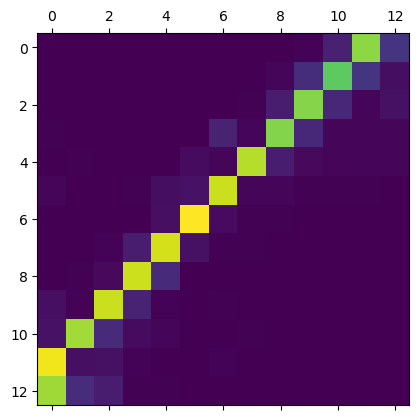

In [ ]:
import matplotlib.pyplot as plt

string = "abacadabacc"  # try something
reversed_string = reversed(string)

src = to_tensor(string)
tgt = to_tensor(reversed_string)

with torch.no_grad():
    _, alignment = attn_model(src, tgt)

attn_matrix = alignment.squeeze(0).numpy()
plt.matshow(attn_matrix)